In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocess

In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/BAI NHOM/Lập trình phân tích dữ liệu/Hotel Reservations.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
#kích thước bộ dữ liệu
print(f'Kích thước bộ dữ liệu gồm: {df.shape[0]} dòng và {df.shape[1]} cột (thuộc tính)')

Kích thước bộ dữ liệu gồm: 36275 dòng và 19 cột (thuộc tính)


In [ ]:
# Thong tin du lieu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Thong ke
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# Thống kê dữ liệu categorical
df.describe(include ='O')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Null Columns

In [ ]:
# Check null
print(df.isnull().sum().sort_values(ascending = False))

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64


In [ ]:
# Check duplicated data
duplicated_rows=df.duplicated()
quantity = duplicated_rows.sum()
print('Số hàng trùng lặp:',quantity)

Số hàng trùng lặp: 0


In [ ]:
def columns(dataframe):
    discrete_columns = []
    continuous_columns = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique() <= 10:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

    return discrete_columns, continuous_columns

discrete_cols, continuous_cols = columns(df)
print("Cột dữ liệu rời rạc:\n", discrete_cols)
print("Cột dữ liệu liên tục:\n", continuous_cols)


Cột dữ liệu rời rạc:
 ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'booking_status']
Cột dữ liệu liên tục:
 ['no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']


In [ ]:
# drop cột booking_ID
df =df.drop("Booking_ID", axis = 1)
# Chuyển cột 'avg_price_per_room' sang dạng số
df['avg_price_per_room'] = pd.to_numeric(df['avg_price_per_room'], errors='coerce')
df.dropna(inplace=True)


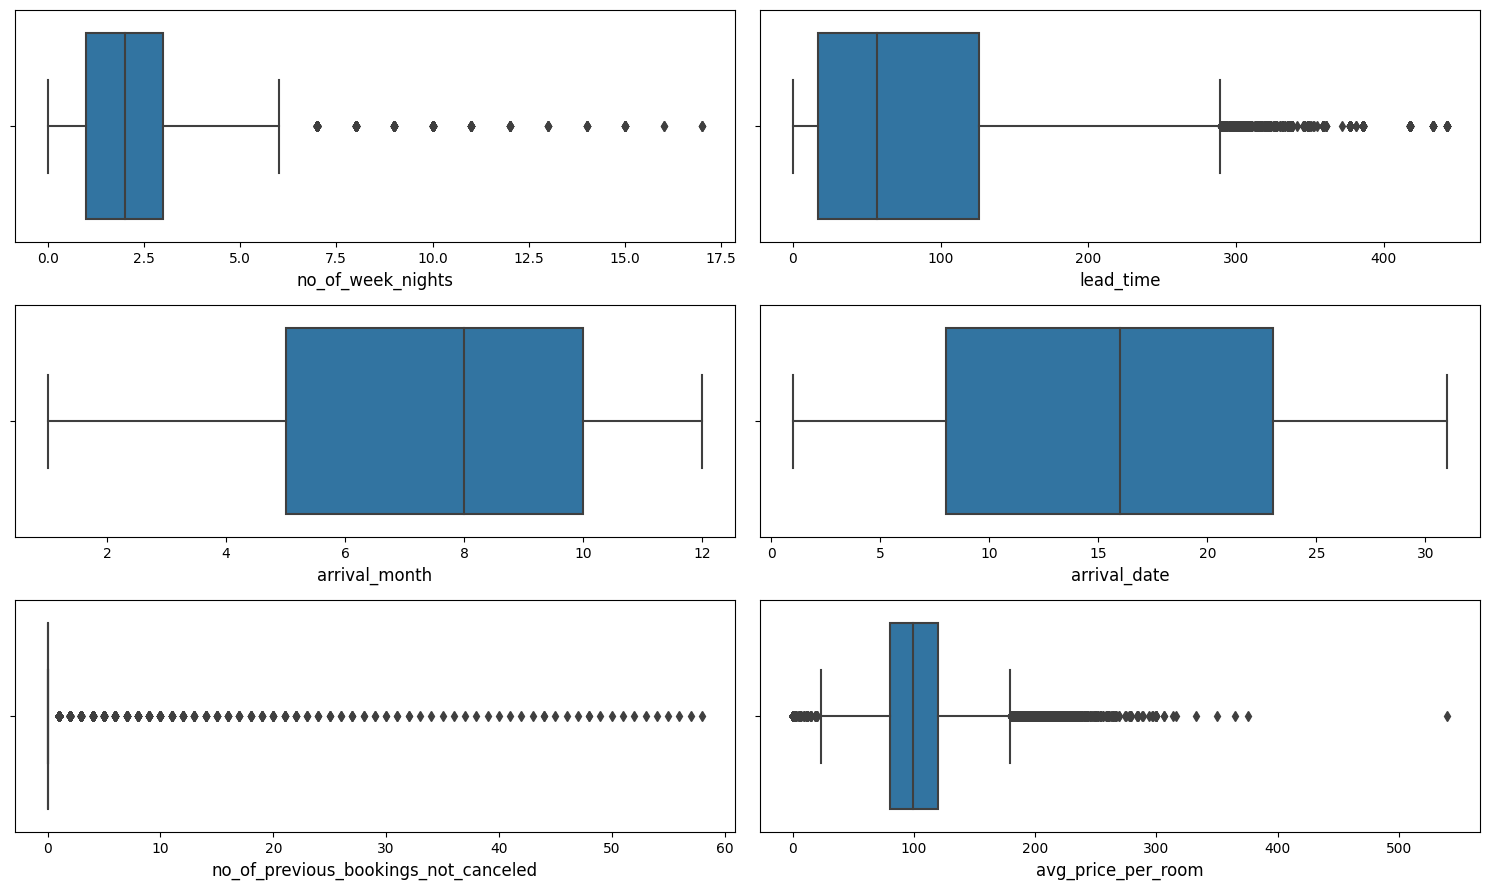

In [ ]:
#outliers

# Vẽ box plot
total_plots = len(continuous_cols)
columns_per_row = 2
rows = -(-total_plots // columns_per_row)
plt.figure(figsize=(15, 9))

for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
df[df['no_of_previous_bookings_not_canceled'] > 0].count()

no_of_adults                            812
no_of_children                          812
no_of_weekend_nights                    812
no_of_week_nights                       812
type_of_meal_plan                       812
required_car_parking_space              812
room_type_reserved                      812
lead_time                               812
arrival_year                            812
arrival_month                           812
arrival_date                            812
market_segment_type                     812
repeated_guest                          812
no_of_previous_cancellations            812
no_of_previous_bookings_not_canceled    812
avg_price_per_room                      812
no_of_special_requests                  812
booking_status                          812
dtype: int64

     Thay thế các giá trị ngoại lệ trong mỗi cột liên tục bằng giá trị trung bình.

     Thông số:
         - df(pd.DataFrame): DataFrame chứa dữ liệu.
         - Inner_multiplier (float): Hệ số nhân để xác định hàng rào bên trong. Mặc định là 1,5.
         -outer_multiplier(float): Hệ số nhân để xác định hàng rào bên ngoài. Mặc định là 3.0.

     Trả về:
         - df(pd.DataFrame): DataFrame với các ngoại lệ được thay thế bằng giá trị trung bình.

In [ ]:
def replace_outliers_with_mean(df: pd.DataFrame) -> pd.DataFrame:
    for col_name in continuous_cols:
        # Tính phạm vi liên tứ phân vị (IQR)
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1

        # Tính giới hạn dưới và giới hạn trên để thay thế các ngoại lệ
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR
        cap_lower_bound = Q1 - 3 * IQR
        cap_upper_bound = Q3 + 3 * IQR

        # Xác định các ngoại lệ
        outliers = (df[col_name] < lower_threshold) | (df[col_name] > upper_threshold) | \
                   (df[col_name] < cap_lower_bound) | (df[col_name] > cap_upper_bound)

        # Thay thế các ngoại lệ bằng giá trị trung bình
        df.loc[outliers, col_name] = round(df[col_name].mean())

    return df

df = replace_outliers_with_mean(df)

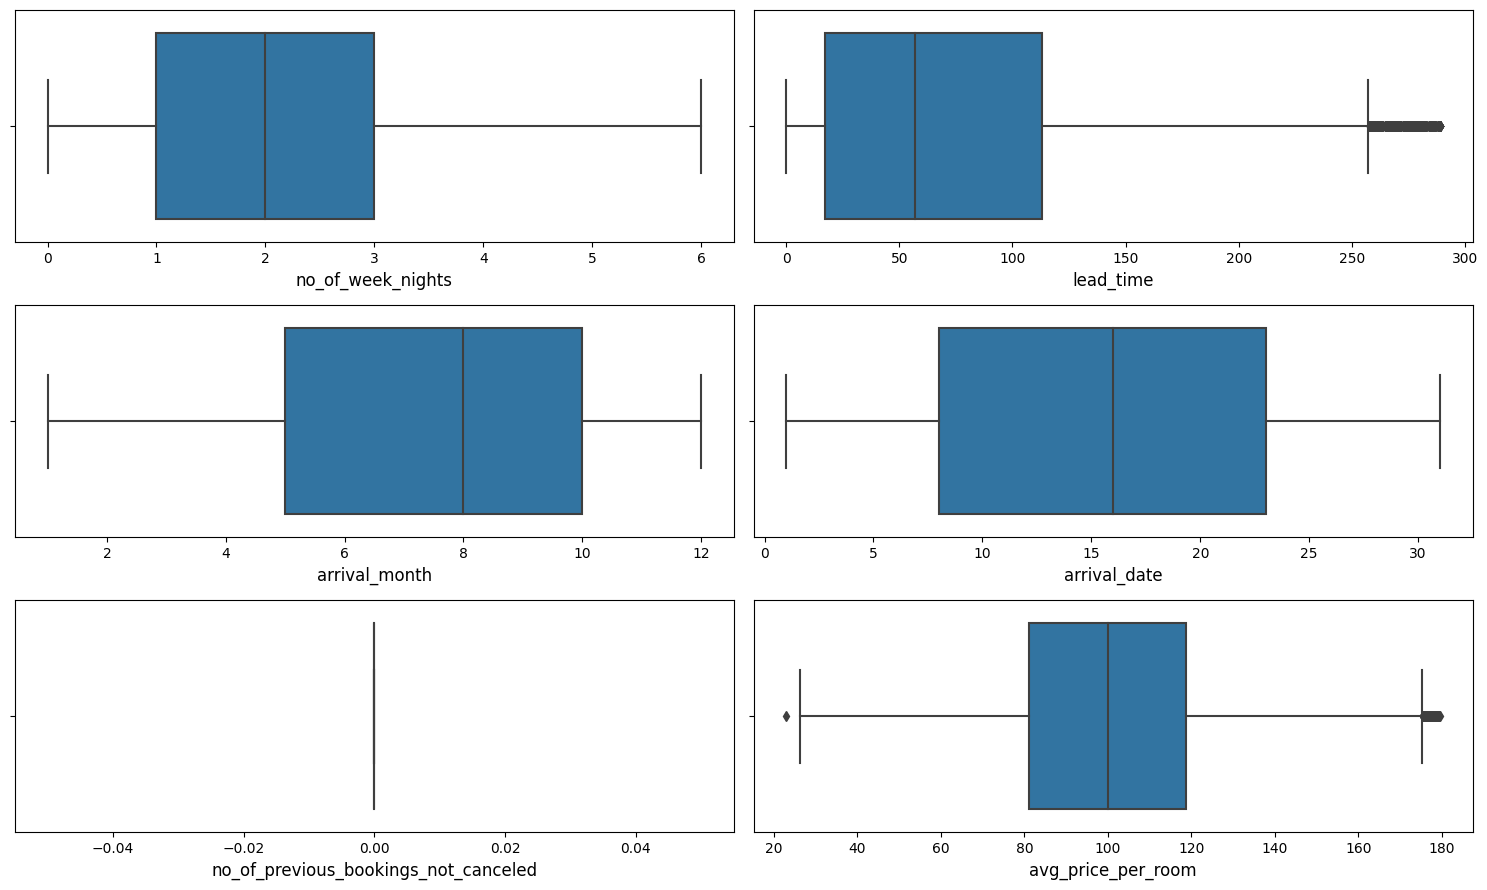

In [ ]:
# Vẽ lại box plot
plt.figure(figsize = (15,9))
for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-82-1ae40b66f85a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr())
<ipython-input-82-1ae40b66f85a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidth = 0.5, mask = mask, cmap = 'Blues')


<Axes: >

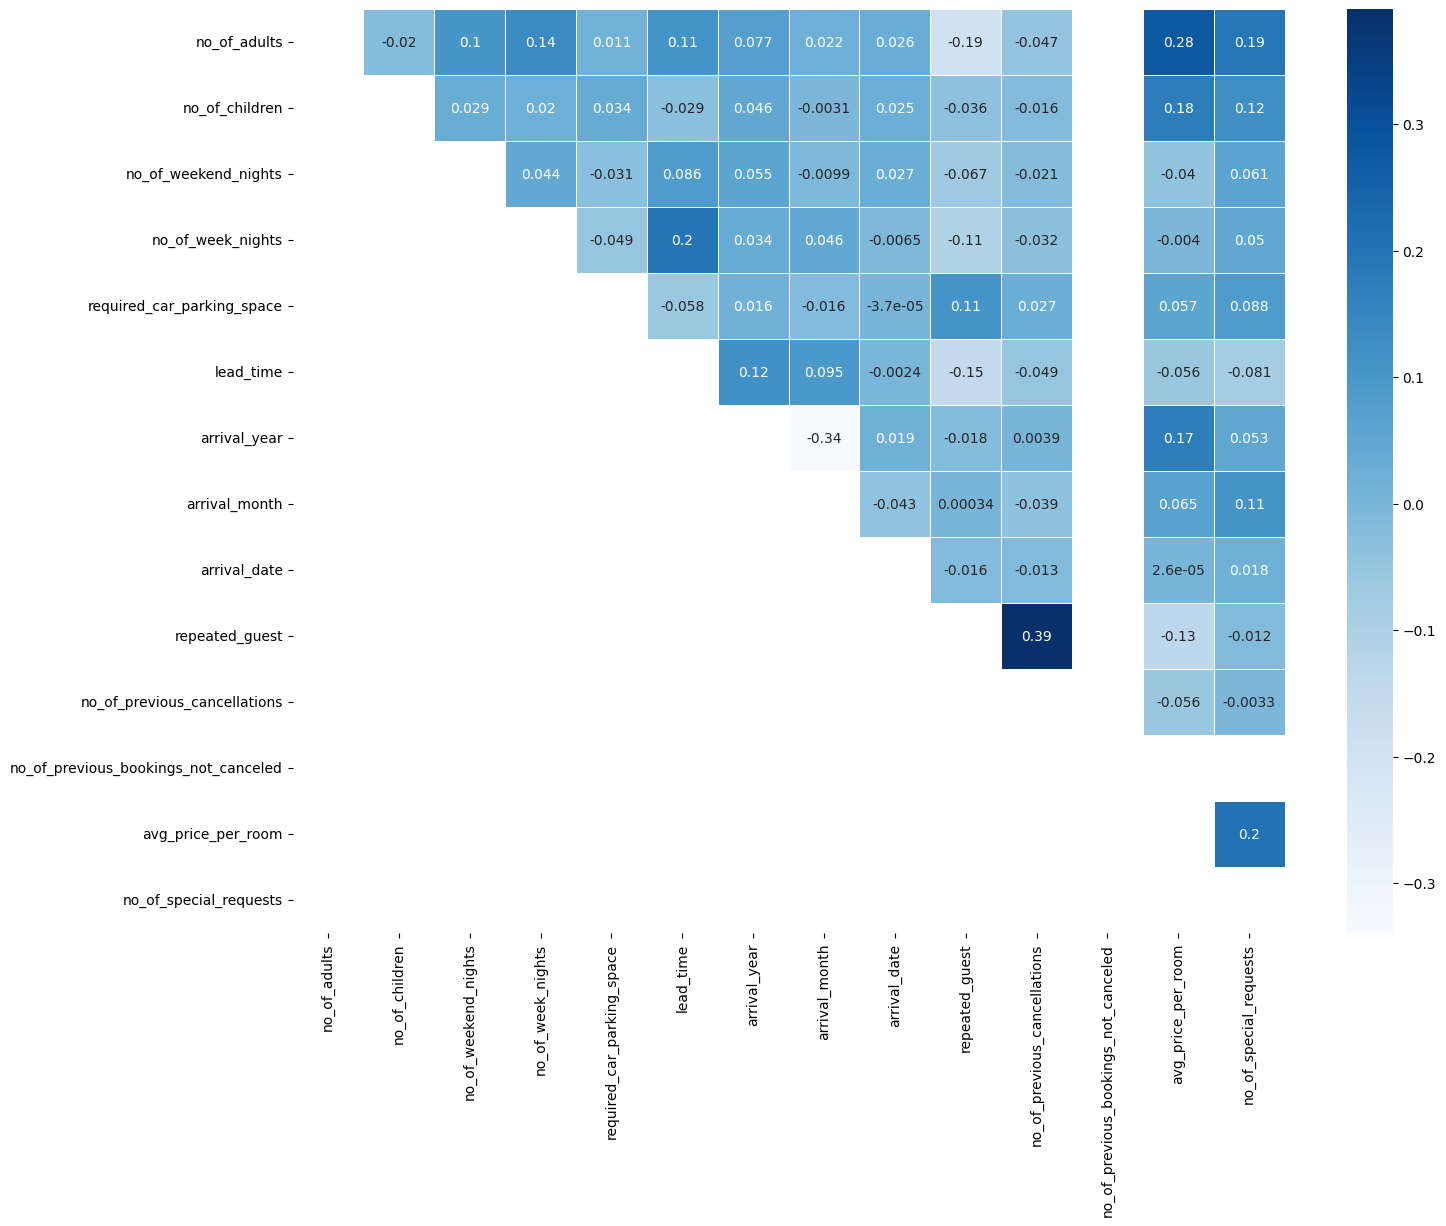

In [ ]:
#tương quan giữa các features

plt.figure(facecolor='w', figsize = (16,12))
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, mask = mask, cmap = 'Blues')

In [ ]:
# Kiểm tra unique value trong các cột categorical
columns = ['type_of_meal_plan', 'room_type_reserved',
           'market_segment_type', 'booking_status']

for column in columns:
  unique_values = df[column].unique()
  print(f"\n{column}: \n{unique_values}\n")


type_of_meal_plan: 
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


room_type_reserved: 
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


market_segment_type: 
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


booking_status: 
['Not_Canceled' 'Canceled']



# EDA


## PHÂN TÍCH ĐƠN BIẾN

#### target: booking status

<Axes: xlabel='booking_status', ylabel='count'>

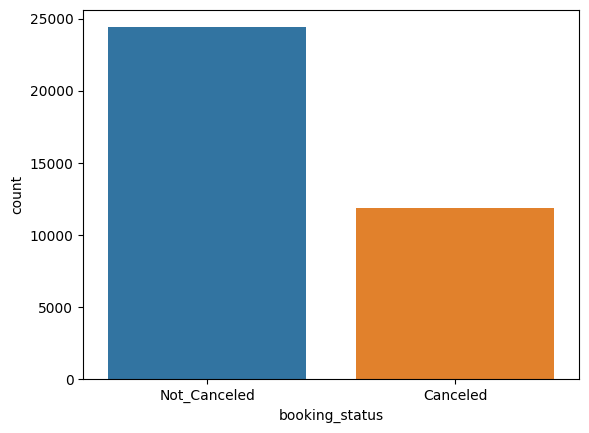

In [ ]:
# trực quan biến target
sns.countplot(x='booking_status', data=df)

#### categorical

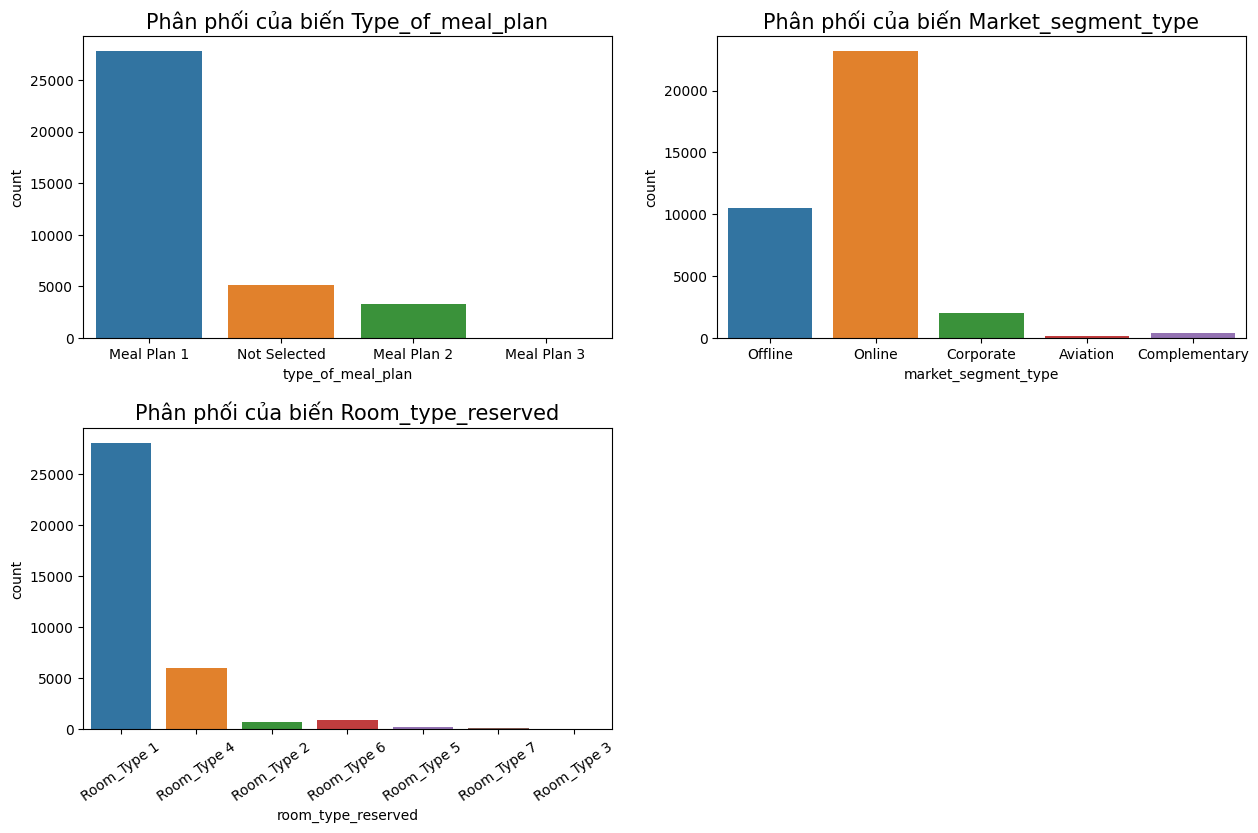

In [ ]:
# phân phối các biến categorical
cat_cols = df[['type_of_meal_plan','market_segment_type','room_type_reserved']]

plt.figure(figsize = (15,9))
plt.subplots_adjust(hspace = 0.3)

for i, col in enumerate(cat_cols, 1):
  plt.subplot(2, 2,i)
  sns.countplot(data = df, x = col)
  plt.title(f'Phân phối của biến {col.capitalize()}', size = 15)
  plt.xticks(rotation=35 if 'room' in col else 0)

plt.show()

#### numerical


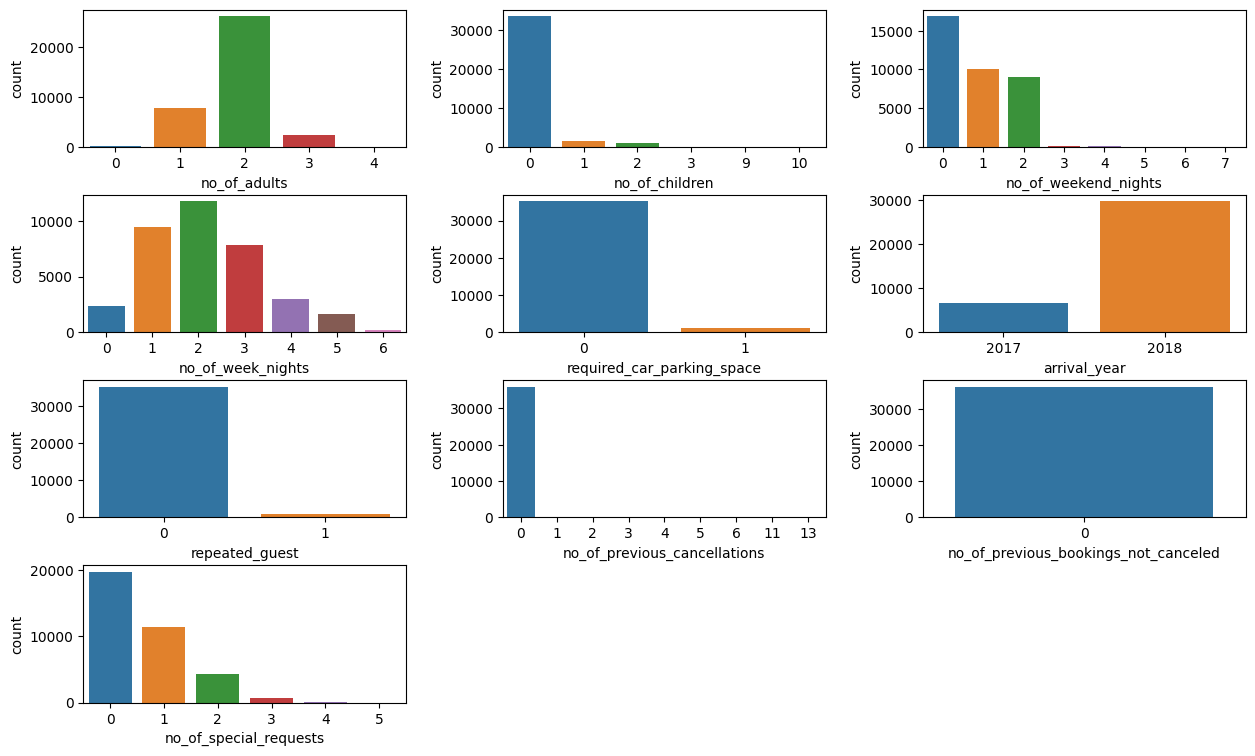

In [ ]:
# Lọc các cột có kiểu dữ liệu là int64
disc_cols = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                'no_of_week_nights','required_car_parking_space',
                'arrival_year','repeated_guest', 'no_of_previous_cancellations',
                'no_of_previous_bookings_not_canceled','no_of_special_requests']]

plt.figure(figsize = (15,9))
plt.subplots_adjust( hspace = 0.35, wspace = 0.3)

for idx, col in enumerate(disc_cols, 1):
  plt.subplot(4,3, idx)
  sns.countplot(data = df, x= col)
plt.show()

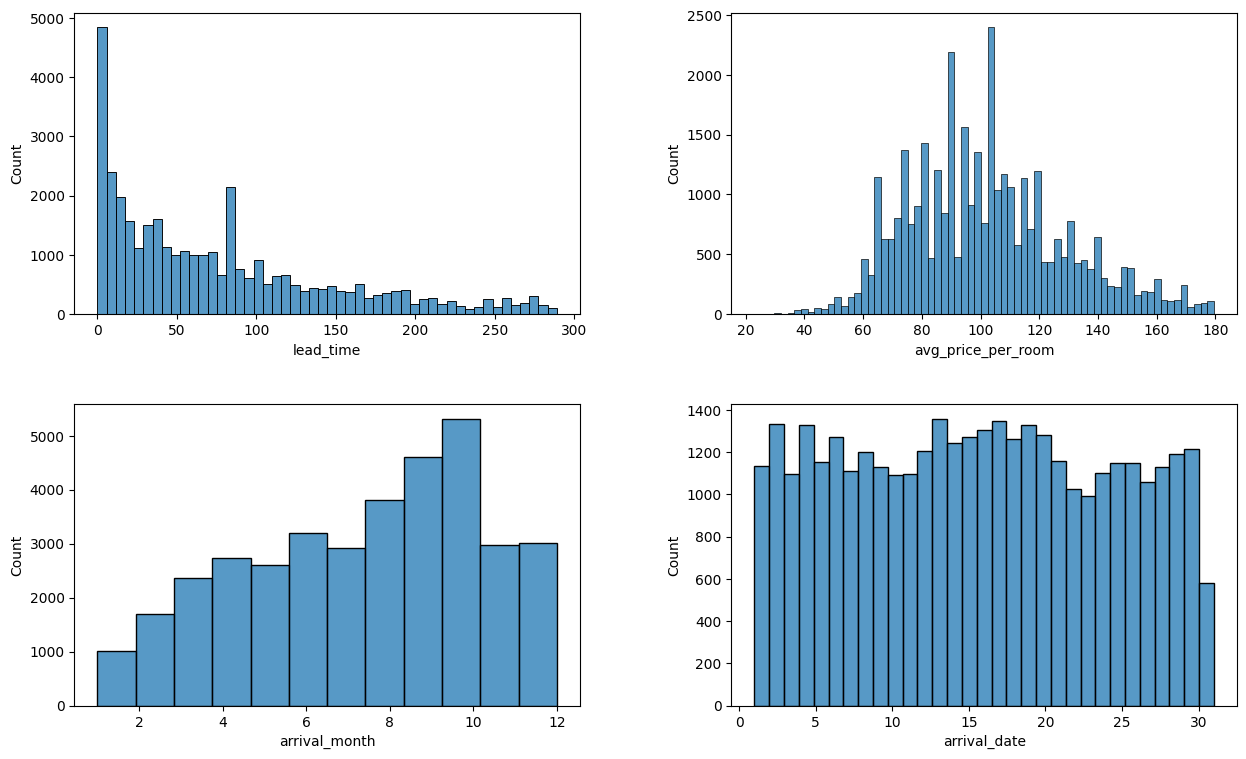

In [ ]:
#
cont_cols = df[['lead_time','avg_price_per_room']]

plt.figure(figsize = (15,9))
plt.subplots_adjust( hspace = 0.3, wspace = 0.3)

for idx, col in enumerate(cont_cols, 1):
  plt.subplot(2,2, idx)
  sns.histplot(data = df, x= col)

# Vẽ histogram cho cột "month"
plt.subplot(2, 2, idx + 1)
sns.histplot(data=df, x='arrival_month', bins=12, kde=False)
# plt.title('Histogram of Month')

# Vẽ histogram cho cột "month"
plt.subplot(2, 2, idx + 2)
sns.histplot(data=df, x='arrival_date', bins=31, kde=False)
# plt.title('Histogram of Month')
plt.show()


## PHÂN TÍCH ĐA BIẾN

#### lead time + target

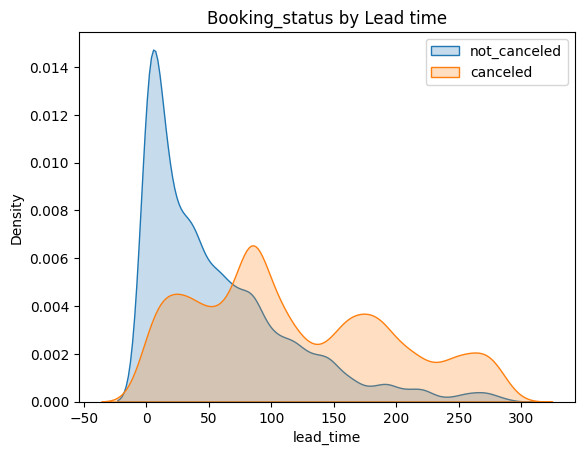

In [ ]:
#lead time và target
canceled= df[df['booking_status']== 'Canceled']['lead_time']
not_canceled = df[df['booking_status']== 'Not_Canceled']['lead_time']
sns.kdeplot(not_canceled, label= 'not_canceled', fill= True)
sns.kdeplot(canceled, label= 'canceled', fill= True)
plt.title('Booking_status by Lead time')
plt.legend()


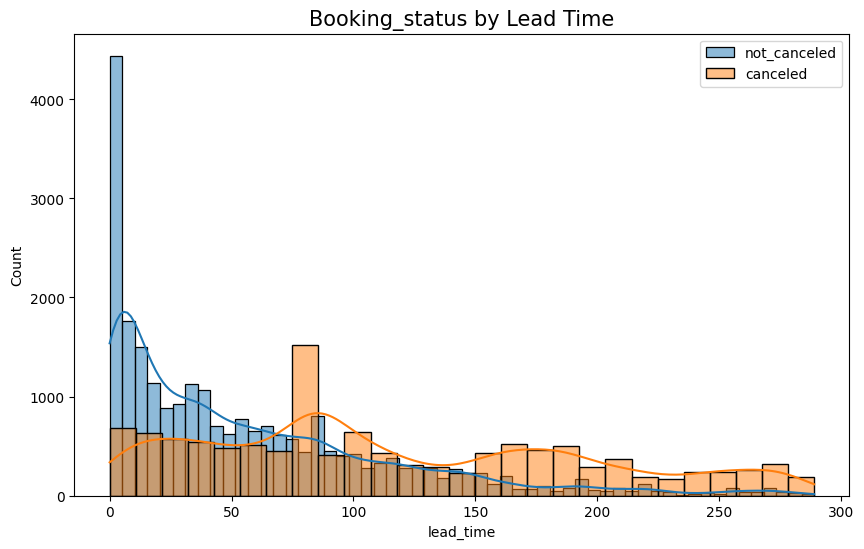

In [ ]:
# lead time vs target
plt.figure(figsize = (10,6))
canceled= df[df['booking_status']== 'Canceled']['lead_time']
not_canceled = df[df['booking_status']== 'Not_Canceled']['lead_time']
sns.histplot(not_canceled, edgecolor='k', label= 'not_canceled', kde= True)
sns.histplot(canceled, edgecolor='k', label= 'canceled', kde= True)
plt.title('Booking_status by Lead Time', size =15)
plt.legend()


#### market segment + target


Text(0.5, 1.0, 'Booking_status based on Market Segment Type by Lead time')

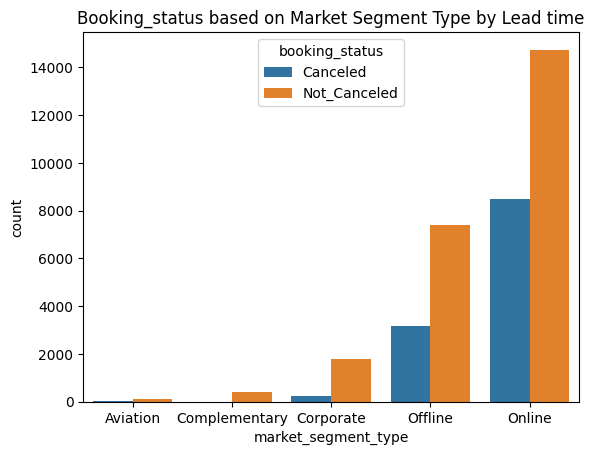

In [ ]:
# market segment type and lead time
lead_time_df = df.groupby(['market_segment_type', 'booking_status']).size().reset_index(name='count')
sns.barplot(data=lead_time_df, x='market_segment_type', y='count', hue='booking_status')
plt.title('Booking_status based on Market Segment Type by Lead time')

In [ ]:
# market segment và Hủy phòng sát ngày
cancel = df[(df['booking_status'] == 'Canceled') & (df['lead_time'] < 2)]

cancel_segment = cancel.groupby('market_segment_type')['lead_time'].count()
print('các nhóm khách hàng có xu hướng hủy phòng sát ngày:', cancel_segment)

các nhóm khách hàng có xu hướng hủy phòng sát ngày: market_segment_type
Aviation       4
Corporate     14
Offline       51
Online       109
Name: lead_time, dtype: int64


#### avg price + target

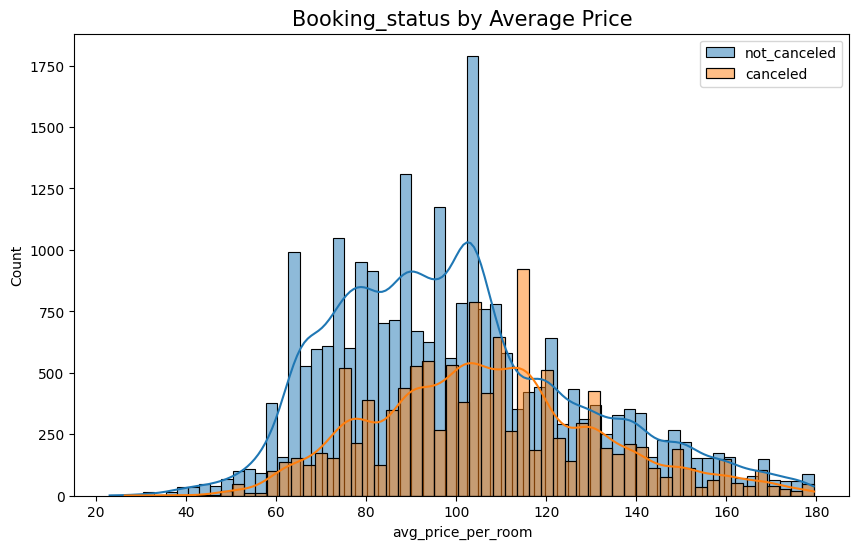

In [ ]:
# price vs target
plt.figure(figsize = (10,6))
canceled= df[df['booking_status']== 'Canceled']['avg_price_per_room']
not_canceled = df[df['booking_status']== 'Not_Canceled']['avg_price_per_room']
sns.histplot(not_canceled, edgecolor='k', label= 'not_canceled', kde= True)
sns.histplot(canceled, edgecolor='k', label= 'canceled', kde= True)
plt.title('Booking_status by Average Price', size =15)
plt.legend()


In [ ]:
#cancel
high_price = df[(df['avg_price_per_room'] > 120) & (df['booking_status'] == "Canceled")]

room_type_canceled = high_price.groupby('room_type_reserved')['avg_price_per_room'].count()

#not cancel
high_price1 = df[(df['avg_price_per_room'] > 120) & (df['booking_status'] == "Not_Canceled")]

room_type_not_canceled = high_price1.groupby('room_type_reserved')['avg_price_per_room'].count()

#
room_type = df.groupby('room_type_reserved')['avg_price_per_room'].count()
# Dataframe giữa loại phòng và trạng thái đặt phòng.
result_df = pd.DataFrame({'Canceled': room_type_canceled,
                          'Not Canceled': room_type_not_canceled,
                          'Total (all prices)': room_type})
print(result_df)

                    Canceled  Not Canceled  Total (all prices)
room_type_reserved                                            
Room_Type 1             1390          2730               28130
Room_Type 2               21            29                 692
Room_Type 3                1             1                   7
Room_Type 4             1358          1928                6057
Room_Type 5               23            78                 265
Room_Type 6              180           237                 966
Room_Type 7                3            10                 158


#### week(end) days + target

([<matplotlib.patches.Wedge at 0x7c8597d74400>,
 [Text(0.47252524530092005, 0.9933377535125228, 'Canceled'),
  Text(-0.47252524530091994, -0.9933377535125228, 'Not_Canceled')],
 [Text(0.2577410428914109, 0.5418205928250124, '35.9%'),
  Text(-0.25774104289141087, -0.5418205928250124, '64.1%')])

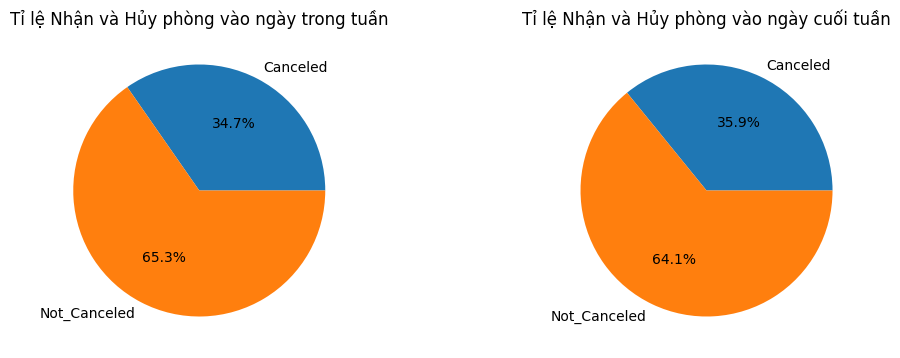

In [ ]:
# week days
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
week_days = df.groupby('booking_status')['no_of_week_nights'].sum()
labels = ['Canceled', 'Not_Canceled']
plt.pie(week_days, labels = labels,autopct='%1.1f%%')
plt.title('Tỉ lệ Nhận và Hủy phòng vào ngày trong tuần')

# weekend days
plt.subplot(2,2,2)
weekend_days = df.groupby('booking_status')['no_of_weekend_nights'].sum()
plt.title('Tỉ lệ Nhận và Hủy phòng vào ngày cuối tuần')
plt.pie(weekend_days, labels = labels,autopct='%1.1f%%')

In [ ]:
# Tạo cột is_weekend dựa trên điều kiện
df['is_weekend'] = df['no_of_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
##----------------------------------------------------
## Các giả thuyết kiểm định
##    H0: Ngàu cuối tuần và trạng thái đặt phòng là ĐỘC LẬP
##    Ha: Ngàu cuối tuần và trạng thái đặt phòng là PHỤ THUỘC NHAU
##----------------------------------------------------
alpha            = .05
confidence_level = (1 - alpha)

## Kiểm định Chi-square
contingency_table = pd.crosstab(df['is_weekend'], df['booking_status'])
stat, p, dof, expected = stats.chi2_contingency(contingency_table)

#chi2 giữa target (cate) vs feature (num) -> xem mức độ tương quan từng biến

## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha} nên bác bỏ H0 ==> is_weekend và booking_status PHỤ THUỘC nhau')
else:
    print(f'Trị số p = {p} >= {alpha} KHÔNG bác bỏ H0 ==>  is_weekend và booking_status ĐỘC LẬP')

Trị số p = 1.9931792331627656e-22 < 0.05 nên bác bỏ H0 ==> is_weekend và booking_status PHỤ THUỘC nhau


#### year + month + target

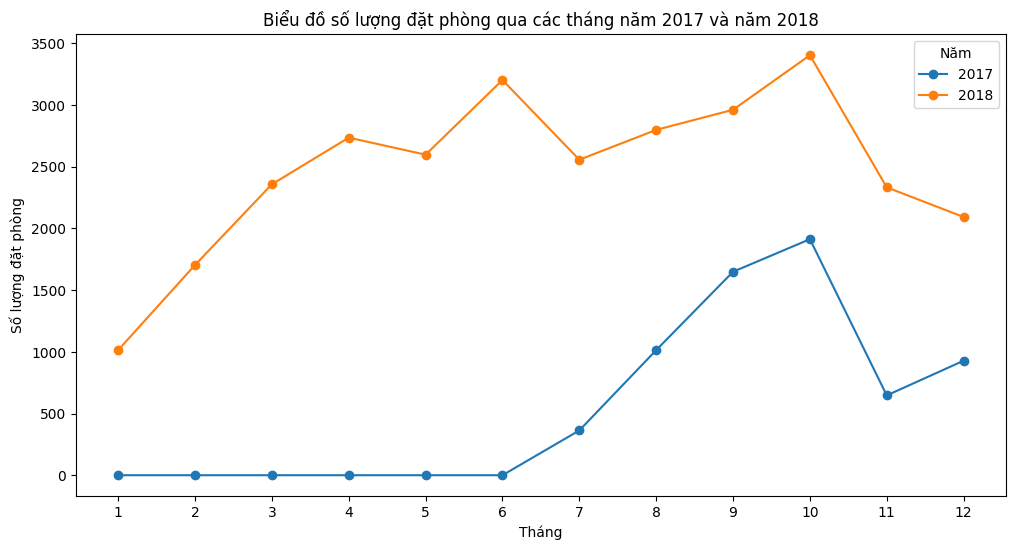

In [ ]:
# số lượng đặt phòng giữa các tháng trong 2 năm
booking_counts = df.groupby(['arrival_year', 'arrival_month']).size()
booking_counts = booking_counts.unstack(level='arrival_year').fillna(0)
# Vẽ biểu đồ đường cho từng năm
plt.figure(figsize=(12, 6))
for year in booking_counts.columns:
    plt.plot(booking_counts.index, booking_counts[year], marker='o', label=str(year))


plt.title('Biểu đồ số lượng đặt phòng qua các tháng năm 2017 và năm 2018')
plt.xlabel('Tháng')
plt.ylabel('Số lượng đặt phòng')
plt.xticks(range(1, 13))
plt.legend(title='Năm')
plt.show()


#### arrival date + target

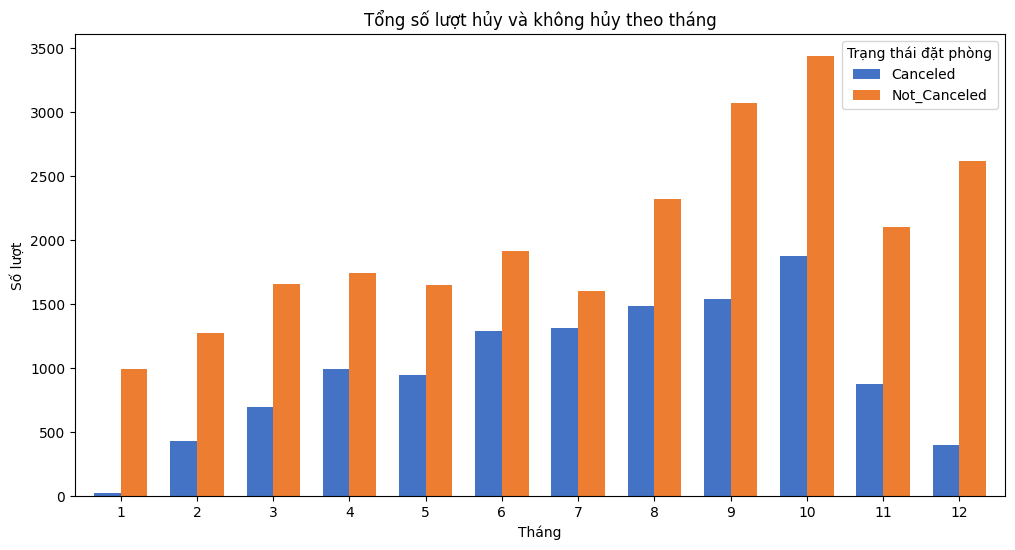

In [ ]:
grouped_df = df.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0)
# Vẽ biểu đồ
grouped_df.plot(kind='bar', figsize=(12, 6),color=['#4472C4','#ED7D31'],width=0.7)
plt.title('Tổng số lượt hủy và không hủy theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượt')
plt.legend(title='Trạng thái đặt phòng')
plt.xticks(rotation=0)
plt.show()


#### repeated guest

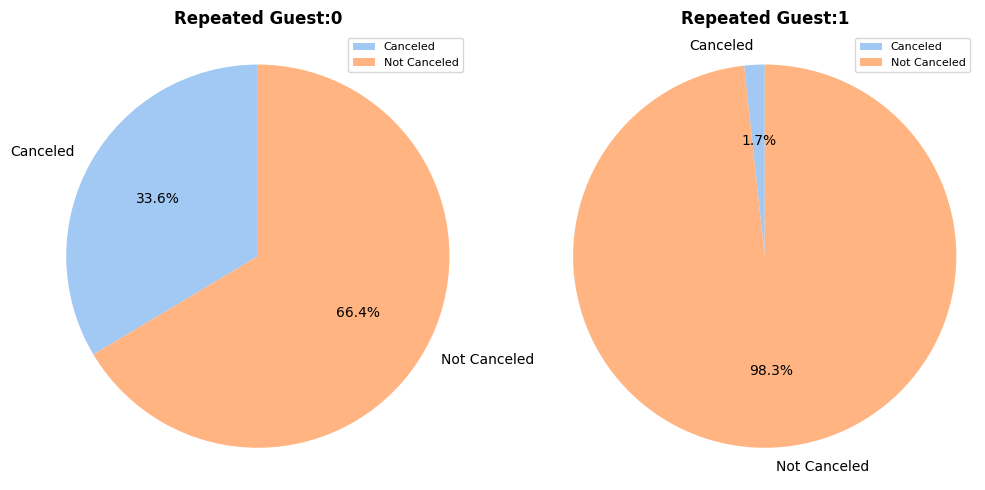

In [ ]:
cancel_rate2 = df.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).unstack().fillna(0)
cancel_rate2.reset_index(inplace=True)

colors = sns.color_palette('pastel')[0:2]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, repeated in enumerate(cancel_rate2['repeated_guest']):
    cancel_value = cancel_rate2.loc[cancel_rate2['repeated_guest'] == repeated, 'Canceled'].values[0]
    non_cancel_value = cancel_rate2.loc[cancel_rate2['repeated_guest'] == repeated, 'Not_Canceled'].values[0]
    labels = ['Canceled', 'Not Canceled']
    values = [cancel_value, non_cancel_value]

    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Repeated Guest:{repeated}', fontsize=12, fontweight='bold')
    axs[i].axis('equal')

    axs[i].legend(labels=labels, loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()



#### room type + target


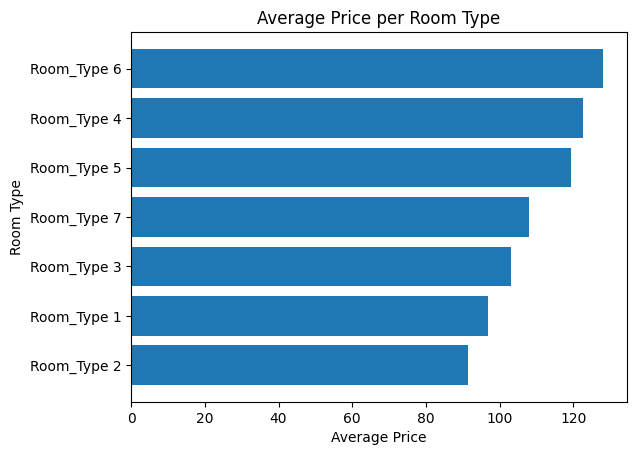

In [ ]:
avg_price = df.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values()
plt.barh(avg_price.index, avg_price.values)
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.title('Average Price per Room Type')
plt.show()

In [ ]:
avg_price = df.groupby('room_type_reserved')['avg_price_per_room'].mean()
avg_price

room_type_reserved
Room_Type 1     96.925979
Room_Type 2     91.264928
Room_Type 3    103.107143
Room_Type 4    122.526033
Room_Type 5    119.394679
Room_Type 6    128.115590
Room_Type 7    107.833418
Name: avg_price_per_room, dtype: float64

In [ ]:
grouped = df['room_type_reserved'].value_counts().sort_values()
grouped

Room_Type 3        7
Room_Type 7      158
Room_Type 5      265
Room_Type 2      692
Room_Type 6      966
Room_Type 4     6057
Room_Type 1    28130
Name: room_type_reserved, dtype: int64

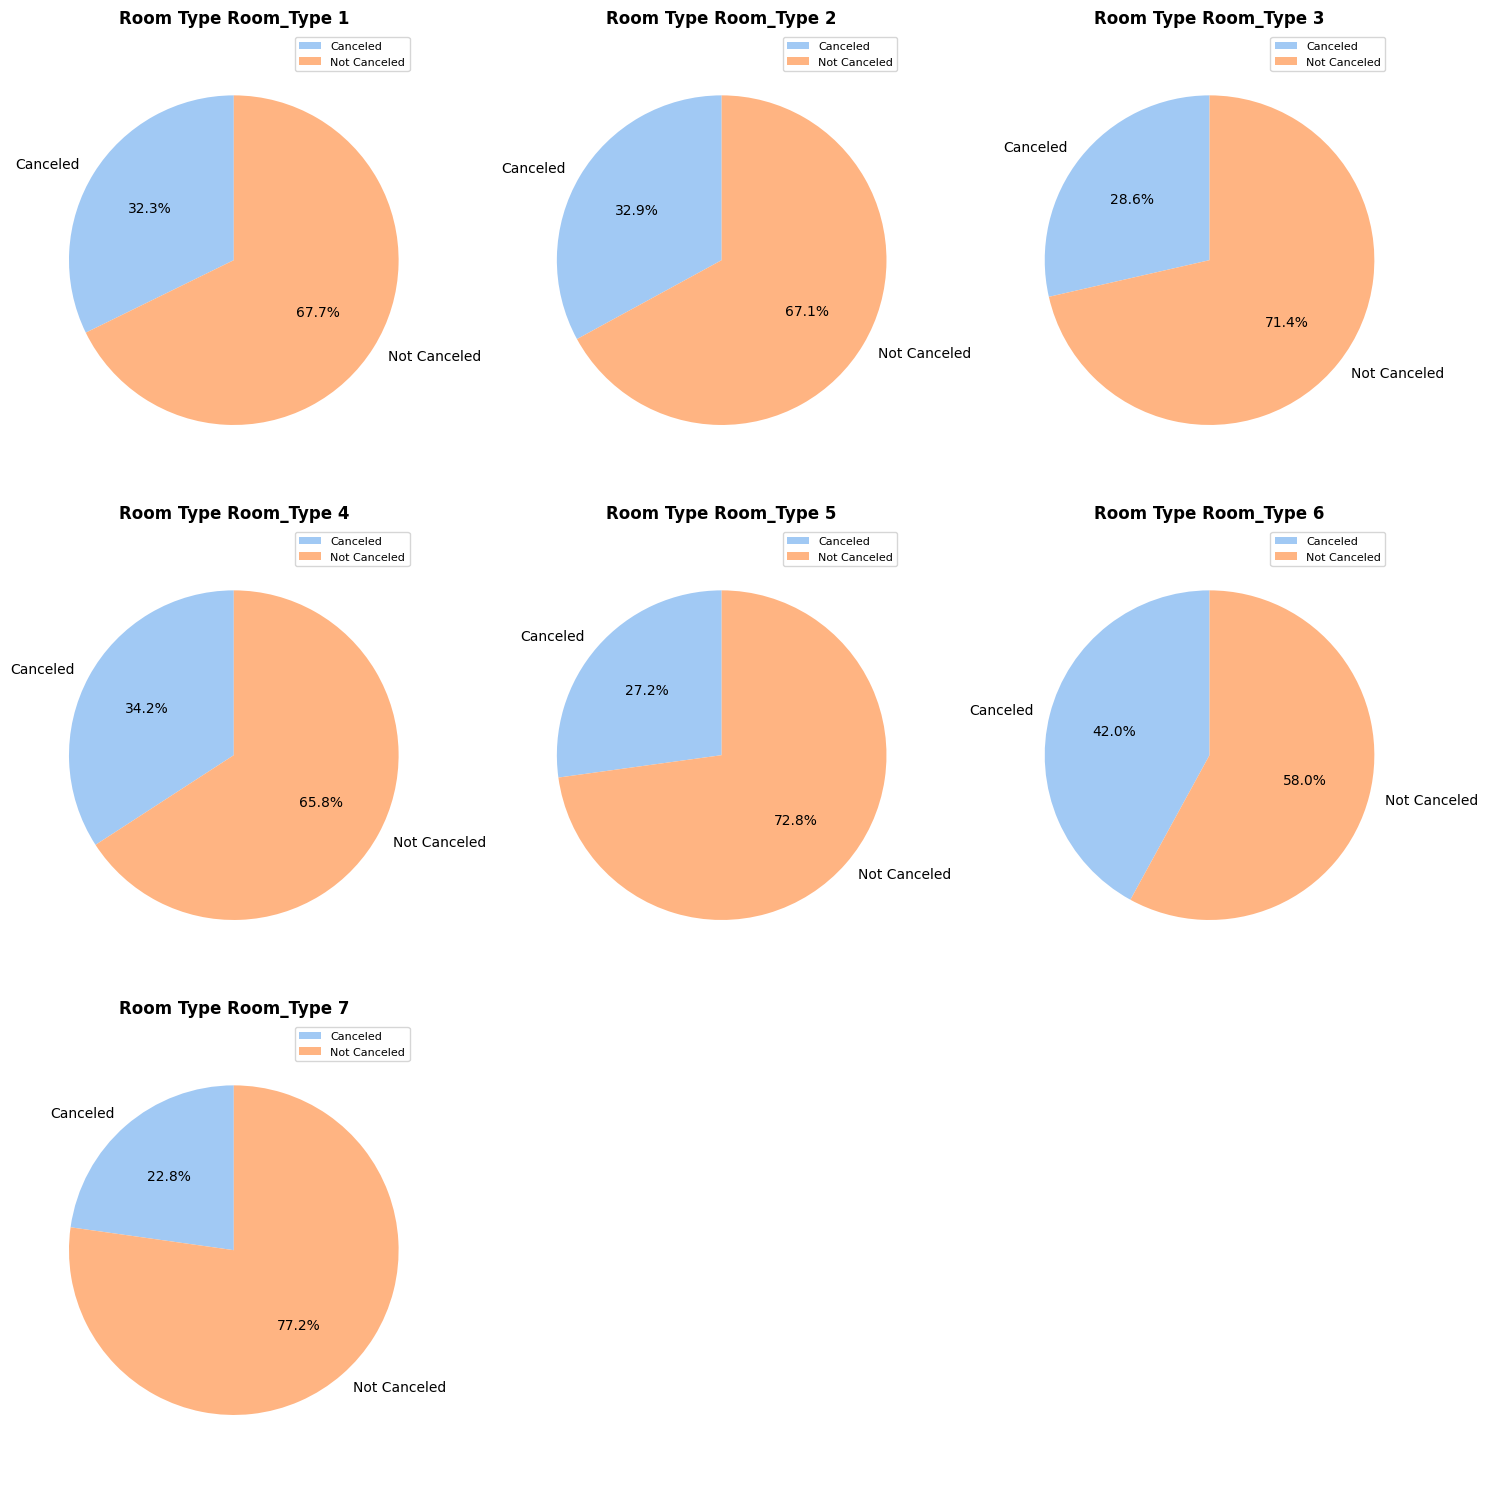

In [ ]:
cancel_rate = df.groupby('room_type_reserved')['booking_status'].value_counts(normalize=True).unstack().fillna(0)
cancel_rate.reset_index(inplace=True)

colors = sns.color_palette('pastel')[0:2]

fig, axs = plt.subplots(3, 3, figsize=(15,15))  # Sử dụng 2 hàng và 4 cột

for i, roomtype in enumerate(cancel_rate['room_type_reserved']):
    cancel_value = cancel_rate.loc[cancel_rate['room_type_reserved'] == roomtype, 'Canceled'].values[0]
    non_cancel_value = cancel_rate.loc[cancel_rate['room_type_reserved'] == roomtype, 'Not_Canceled'].values[0]
    labels = ['Canceled', 'Not Canceled']
    values = [cancel_value, non_cancel_value]

    row = i // 3  # Số hàng của subplot
    col = i %  3  # Số cột của subplot

    axs[row, col].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[row, col].set_title(f'Room Type {roomtype}', fontsize=12, fontweight='bold')
    axs[row, col].axis('equal')
    axs[row, col].legend(labels=labels, loc='upper right', fontsize=8)

# Tắt các subplot trống
for i in range(len(cancel_rate), 3 * 3):
    row = i // 3  # Số hàng của subplot
    col = i % 3   # Số cột của subplot
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
cancel_rate

booking_status,room_type_reserved,Canceled,Not_Canceled
0,Room_Type 1,0.322503,0.677497
1,Room_Type 2,0.329480,0.670520
2,Room_Type 3,0.285714,0.714286
3,Room_Type 4,0.341588,0.658412
4,Room_Type 5,0.271698,0.728302
5,Room_Type 6,0.420290,0.579710
6,Room_Type 7,0.227848,0.772152


In [ ]:
#Tạo bảng crosstab
observed = pd.crosstab(df['room_type_reserved'], df['booking_status']) #Tạo bảng crosstab

#giả thuyết
# H0: không có sự ảnh hưởng giữa loại phòng với trạng thái đặt phòng
# Ha: có sự ảnh hưởng giữa loại phòng với trạng thái đặt phòng

# Thực hiện kiểm định chi-square
chi2, p_value, dof, expected = chi2_contingency(observed)

# Hiển thị kết quả
print(f"Giá trị chi-square: {chi2}")
print(f"Giá trị p-value: {p_value}")
alpha = 0.05
#H0: Không có sự khác biệt giữa các loại phòng
if p_value < alpha:
    print("Có bằng chứng để bác bỏ giả thuyết H0.\n => có sự khác biệt đáng kể về tỷ lệ canceled hoặc not_canceled giữa các roomtype.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0.\n => Không có sự khác biệt đáng kể về tỷ lệ canceled hoặc not_canceled giữa các roomtype.")

Giá trị chi-square: 57.33495179790707
Giá trị p-value: 1.5627796772447482e-10
Có bằng chứng để bác bỏ giả thuyết H0.
 => có sự khác biệt đáng kể về tỷ lệ canceled hoặc not_canceled giữa các roomtype.


#### car parking request + target

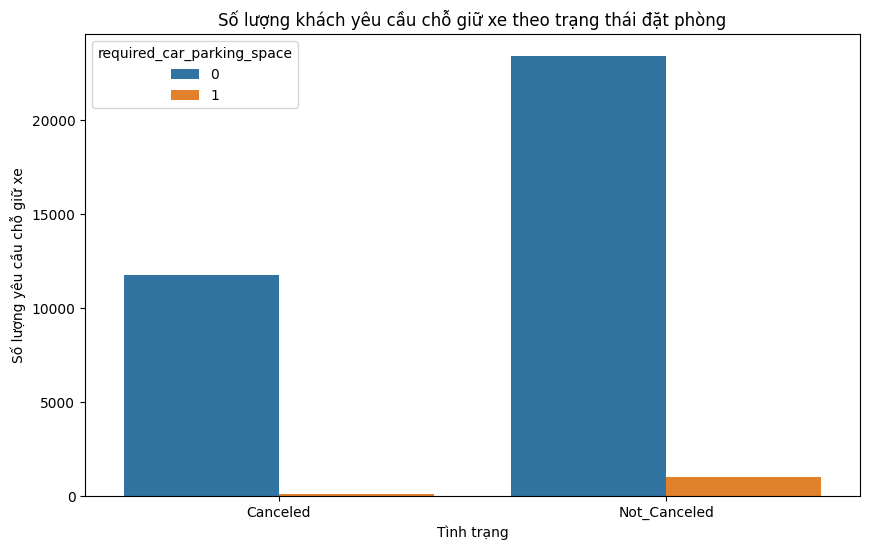

In [ ]:
average_per_status = df.groupby(['booking_status','required_car_parking_space']).size().reset_index(name ='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='booking_status', y='count',hue = 'required_car_parking_space', data=average_per_status)
plt.xlabel('Tình trạng')
plt.ylabel('Số lượng yêu cầu chỗ giữ xe')
plt.title('Số lượng khách yêu cầu chỗ giữ xe theo trạng thái đặt phòng')
plt.show()


#### meal plan type + target

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


<Figure size 1000x600 with 0 Axes>

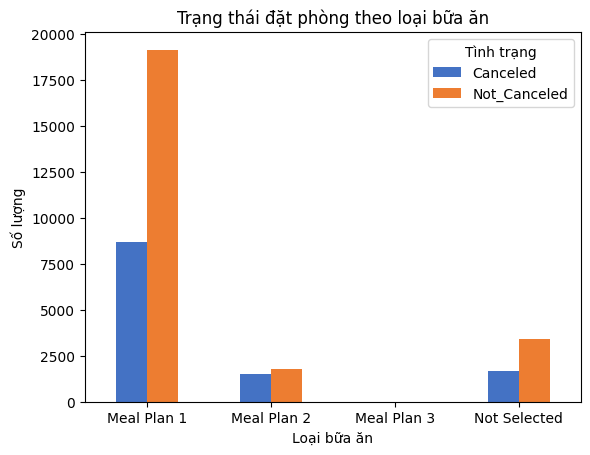

In [ ]:
type_meal = df.groupby(['type_of_meal_plan', 'booking_status']).size().unstack()
print(type_meal)
plt.figure(figsize=(10, 6))
type_meal.plot(kind='bar', color=['#4472C4','#ED7D31'])
plt.xlabel('Loại bữa ăn')
plt.ylabel('Số lượng')
plt.title('Trạng thái đặt phòng theo loại bữa ăn')
plt.legend(title='Tình trạng')
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Giá phòng khách không chọn bữa ăn nào')

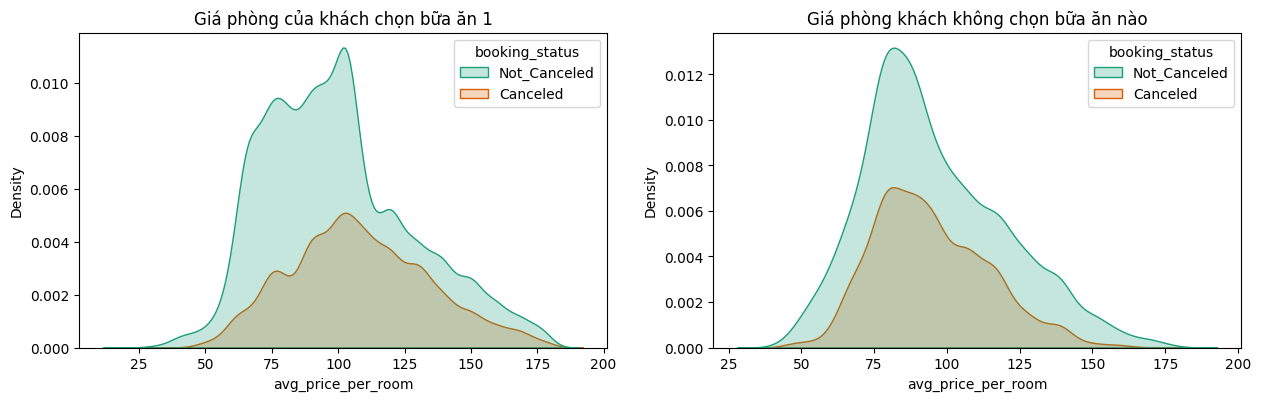

In [ ]:
## phân phối giá phòng các loại bưa ăn
# meal plan 1
plt.figure(figsize = (15,9))
plt.subplot(2,2,1)

meal_plan1 = df[df['type_of_meal_plan'] == 'Meal Plan 1']
sns.kdeplot(data = meal_plan1, x= 'avg_price_per_room',fill= True, hue = 'booking_status',palette = 'Dark2')
plt.title('Giá phòng của khách chọn bữa ăn 1')
# phân phối giá phòng khi khách không chọn ăn tại khách sạn
plt.subplot(2,2,2)
not_select = df[df['type_of_meal_plan'] == 'Not Selected']
sns.kdeplot(data = not_select, x= 'avg_price_per_room', fill= True,hue = 'booking_status',palette = 'Dark2')
plt.title('Giá phòng khách không chọn bữa ăn nào')

# MACHINE LEARNING

PCA

     Áp dụng PCA cho các cột, tạo cột mới với thành phần chính và loại bỏ các cột ban đầu.

     Thông số:
         - df(pd.DataFrame): DataFrame chứa dữ liệu.
         - columns_to_pca(list): Danh sách tên cột áp dụng PCA.
         - new_column_name (str): Tên cho cột mới có thành phần chính.

     Trả về:
         - df (pd.DataFrame): DataFrame với PCA được áp dụng và các cột gốc bị loại bỏ.

In [ ]:
def pca_and_drop(df, columns_to_pca, new_column_name):
    pca = PCA(n_components=1)
    # Áp dụng PCA
    pca_result = pca.fit_transform(df[columns_to_pca])
    # Tạo một cột mới với thành phần chính
    df[new_column_name] = pca_result
    # Bỏ các cột ban đầu
    df.drop(columns=columns_to_pca, inplace=True)
    return df

# Áp dụng PCA cho "no_of_adults" và "no_of_children"
df = pca_and_drop(df, ["no_of_adults", "no_of_children"], "no_of_people")

# Áp dụng PCA cho "no_of_weekend_nights" và "no_of_week_nights"
df = pca_and_drop(df, ["no_of_weekend_nights", "no_of_week_nights"], "no_of_week_days")


Mã hóa dữ liệu categorical

In [ ]:
# Mã hóa dữ liệu
def encode_categorical_columns(df, label_columns, ordinal_columns):
    label_encoder = LabelEncoder()
    ordinal_encoder = OrdinalEncoder()
    # label encode
    df[label_columns] = df[label_columns].apply(label_encoder.fit_transform)
    # ordinal encode
    df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
    return df

df = encode_categorical_columns(df, label_columns=["market_segment_type", "booking_status"], ordinal_columns=["type_of_meal_plan", "room_type_reserved"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     36275 non-null  float64
 1   required_car_parking_space            36275 non-null  int64  
 2   room_type_reserved                    36275 non-null  float64
 3   lead_time                             36275 non-null  int64  
 4   arrival_year                          36275 non-null  int64  
 5   arrival_month                         36275 non-null  int64  
 6   arrival_date                          36275 non-null  int64  
 7   market_segment_type                   36275 non-null  int64  
 8   repeated_guest                        36275 non-null  int64  
 9   no_of_previous_cancellations          36275 non-null  int64  
 10  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 11  avg_price_per_r

In [ ]:
# Chia dữ liệu
target = 'booking_status'
X = df.drop(columns=[target], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Kích thước của dữ liệu huấn luyện: {X_train.shape[0]} hàng và {X_train.shape[1]} cột.")
print(f"Kích thước của dữ liệu thử nghiệm: {X_test.shape[0]} hàng và {X_test.shape[1]} cột.")

Kích thước của dữ liệu huấn luyện: 25392 hàng và 16 cột.
Kích thước của dữ liệu thử nghiệm: 10883 hàng và 16 cột.


In [ ]:
y_train

29580    0
6325     0
33899    1
720      1
22120    1
        ..
16850    1
6265     0
11284    1
860      0
15795    1
Name: booking_status, Length: 25392, dtype: int64

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
# Fit và transform training data
X_train = scaler.fit_transform(X_train)
# Transform testing data
X_test = scaler.transform(X_test)

Giải quyết vấn đề mất cân bằng lớp trong dữ liệu huấn luyện

Oversampling: Tăng số lượng quan sát trong lớp thiểu số

Undersampling: Giảm số lượng quan sát trong lớp đa số

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
}



     Hàm đánh giá các mô hình khác nhau bằng cách sử dụng cả oversampling và undersampling

     Thông số:
         - models (dict): Từ điển tên model và đối tượng model.

     Trả về:
         - results (pd.DataFrame): Một DataFrame
    
    In ra kết quả của mô hình và các độ đo đánh giá (Accuracy, Recall, Precision, F1).

    Parameters:
    - model: Mô hình đã được huấn luyện.
    - X_test: Dữ liệu thử nghiệm.
    - y_test: Nhãn thực tế của dữ liệu thử nghiệm.

In [ ]:
def train_models(models: dict):
    results = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])

    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Tính các thông số
        accuracy = round(accuracy_score(y_test, y_pred), 3)
        recall = round(recall_score(y_test, y_pred), 3)
        precision = round(precision_score(y_test, y_pred), 3)
        f1 = round(f1_score(y_test, y_pred), 3)

        # lưu lại thành dataframe
        results = results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        }, ignore_index=True)

        print(f"{model_name}")
    results.sort_values(by="Accuracy", ascending=False, inplace=True)
    return results


In [ ]:
df_results = train_models(models)

<ipython-input-116-24913284bc18>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


Logistic Regression


<ipython-input-116-24913284bc18>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


Random Forest Classifier


<ipython-input-116-24913284bc18>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-116-24913284bc18>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


Support Vector Machine
Decision Tree Classifier
KNeighborsClassifier


<ipython-input-116-24913284bc18>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


In [ ]:
df_results

,Model,Accuracy,Recall,Precision,F1
1,Random Forest Classifier,0.900,0.945,0.909,0.926
3,Decision Tree Classifier,0.862,0.896,0.897,0.896
4,KNeighborsClassifier,0.850,0.901,0.877,0.889
2,Support Vector Machine,0.827,0.922,0.836,0.877
0,Logistic Regression,0.782,0.900,0.799,0.846


In [ ]:
# Tối ưu hóa model tốt nhất
gridsearch_model = RandomForestClassifier(random_state=42)
rf_params = {
        'criterion': ["gini", "entropy", "log_loss"],
        'max_features': ["sqrt", "log2", None],
}
# 3x3 = 9 candidates

In [ ]:
grid_cls = GridSearchCV(gridsearch_model, param_grid=rf_params, cv=6, verbose=2)
grid_cls.fit(X_train, y_train)

Fitting 6 folds for each of 9 candidates, totalling 54 fits
[CV] END ..................criterion=gini, max_features=sqrt; total time=   2.3s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   2.6s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   3.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   3.1s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   2.3s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   2.3s
[CV] END ..................criterion=gini, max_features=log2; total time=   2.5s
[CV] END ..................criterion=gini, max_features=log2; total time=   2.3s
[CV] END ..................criterion=gini, max_features=log2; total time=   3.4s
[CV] END ..................criterion=gini, max_features=log2; total time=   3.4s
[CV] END ..................criterion=gini, max_features=log2; total time=   2.3s
[CV] END ..................criterion=gini, max_fe

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             verbose=2)

In [ ]:

# In ra các tham số tối ưu
print("Best Parameters:", grid_cls.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_model = grid_cls.best_estimator_

y_predict = best_model.predict(X_test)
print(classification_report(y_test, y_predict))

Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt'}
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3607
           1       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.900


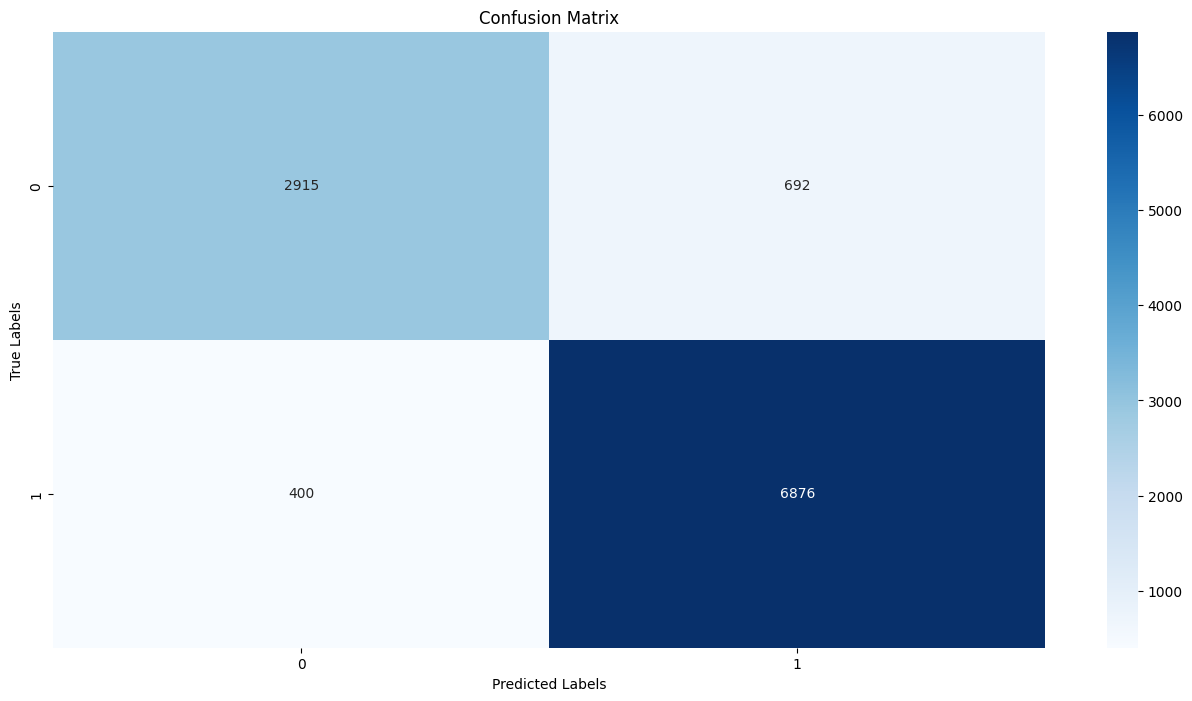

In [ ]:
matrix = confusion_matrix(y_test, y_predict)
matrix_df = pd.DataFrame(matrix, index=np.unique(df[target]), columns=np.unique(df[target]))
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<Axes: xlabel='booking_status', ylabel='count'>

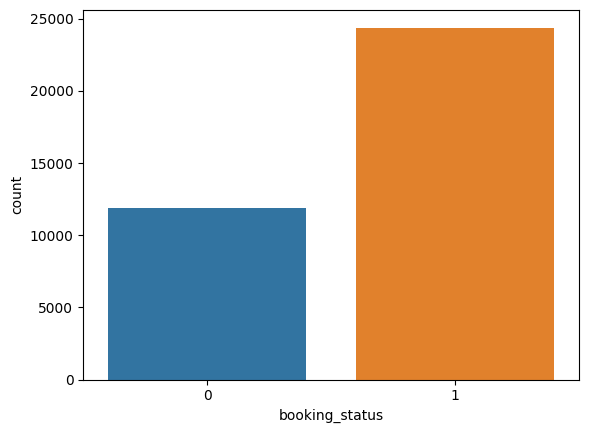

In [ ]:
sns.countplot(data= df, x=df['booking_status'])


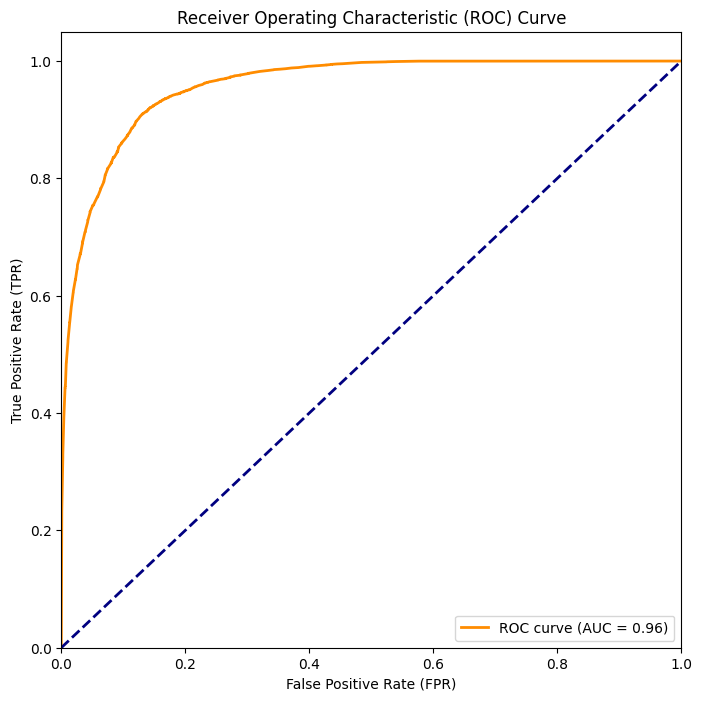

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất của mô hình trên tập kiểm thử
y_prob = grid_cls.predict_proba(X_test)[:, 1]

# Tính false positive rate (FPR), true positive rate (TPR) và ngưỡng (thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính diện tích dưới đường ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
